# Function fitting using neural network

For understanding the potential mechanism.

Sep 3, 2018.

Guorui Shen, guorui233@outlook.com

In this notebook, we consider the task of function fitting, particularly the one-dimensional function $$y=sin(t),$$ was adopted to illustrate the basic idea.

In [1]:
import numpy as np
import random
import scipy.io as sio
from designBasis import *

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

## Data Generating

In [2]:
# Just enable only one of them!
# sine
ff = lambda t: np.sin(t)

# # piecewise function
# def ff(x):
#     conds = [x < 1, (x >= 1) & (x <= 2), x > 2]
#     funcs = [lambda x: x, lambda x: 1, lambda x: -2*x + 5.]
#     return np.piecewise(x, conds, funcs)

# # step function
# def ff(x):
#     conds = [x < 1, x >= 1]
#     funcs = [lambda x: 0, lambda x: 2.]
#     return np.piecewise(x, conds, funcs)

In [3]:
# Parameter settings.
[a, b] = [0.0, 2.0*np.pi]  # interval
n_hidden_nodes = 8  # the number of basis
n_examples = 100    # the number of examples

In [4]:
t_train = np.linspace(a, b, n_examples, dtype = np.float32)
f_train = ff(t_train)

## Function Fitting using Designed Method

In [5]:
slope, Z = constructZ(t_train, a, b, n_hidden_nodes)

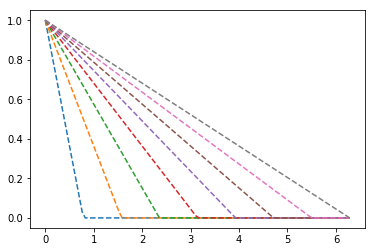

In [6]:
plt.figure()
for i in range(n_hidden_nodes):
    plt.plot(t_train, Z[:, i],'--', markersize = 0.01)

In [7]:
w1 = np.reshape(slope, (1,-1), np.float32)
b1 = np.ones((1, n_hidden_nodes))
temp2 = np.dot(np.linalg.pinv(Z), f_train)
w2 = temp2.reshape(-1, 1)

In [8]:
# Loss of the designed method
print np.linalg.norm(np.matmul(Z, w2) - f_train.reshape(-1, 1), 'f')

0.17250653


## Make Prediction

In [9]:
num_input = 1
num_output = 1

inputs = t_train.reshape(-1, 1)
outputs = f_train.reshape(-1, 1)

In [10]:
nn = neuralnetwork()
slope, Z = constructZ(t_train, a, b, n_hidden_nodes)

w1 = np.reshape(slope, (1,-1))
b1 = np.ones((1, n_hidden_nodes))
w2 = np.matmul(np.linalg.pinv(Z), f_train).reshape(-1, 1)

nn.assign(w1, w2, b1)
pred = nn.predict(t_train.reshape(-1,1))

### Visualization

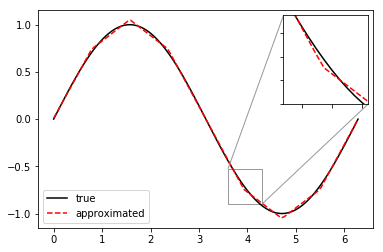

In [11]:
fig, ax = plt.subplots()
ax.plot(t_train, f_train, 'k-', t_train, pred[0], 'r--', markersize = 1)

axins = zoomed_inset_axes(ax, 2.5, loc=1)
# sub region of the original image
x1, x2, y1, y2 = 3.6, 4.3, -.9, -.525
axins.plot(t_train, f_train, 'k-', t_train, pred[0], 'r--', markersize = 1)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.6")

ax.legend(['true', 'approximated'], loc=3, ncol=1)

plt.draw()
plt.show()

In [12]:
# ax.savefig(str(n_hidden_nodes)+'-nodes.pdf', transparent=True)